In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sys
import seaborn as sns
import math
from operator import itemgetter
# read the catapult and vivado csv files first and then 
# process data and make comparisons

cHistdf = pd.read_csv("../csv/catapult_histogram_latency.csv", index_col=0)
vHistdf = pd.read_csv("../csv/vivado_histogram.csv", index_col=0)
li=[]
viv_violin=pd.read_csv("../csv/vivado_histogram_violin.csv",index_col=None)
li.append(viv_violin)
cat_violin=pd.read_csv("../csv/catapult_histogram_latency_violin.csv",index_col=None)
li.append(cat_violin)
violin=pd.concat(li, axis=0, ignore_index=True,sort='False')
l2=[]
l2.append(violin)

# cHist cutting out unneccesary optimizations
#cHistdf = cHistdf[(cHistdf['knob_I_B'] == 0)]
# removing interleave optimizations
#cHistdf = cHistdf[(cHistdf['knob_KNOB_DATA_BLOCK_INTERLEAVE'] > 1000)]
cHistdf = cHistdf.drop(columns=['knob_I_B'])
cHistdf['nTput'] = (vHistdf['obj1'].min())*1/cHistdf['obj1']
cHistdf['resRatio'] = cHistdf['obj2']/147780
cHistdf['1/obj2'] = (vHistdf['obj2'].min())*1/cHistdf['obj2']
#cHistdf['1/obj2'] = (1/cHistdf['obj2'])/(1/cHistdf['obj2'].min())
# get common columns 
cmn_col = np.intersect1d(cHistdf.columns, vHistdf.columns)


#vivHistdf cutting out unneccesary optimizations
vHistdf = vHistdf[(vHistdf['knob_SIMD']==1)]
vHistdf = vHistdf[(vHistdf['knob_COMPUTE_UNITS']==1)]
vHistdf = vHistdf[(vHistdf['knob_ACCUM_SMEM']==0)]
vHistdf = vHistdf[(vHistdf['knob_PIPE_FACTOR']==0)]
#vHistdf['1/obj2'] = (1/vHistdf['obj2'])/(1/vHistdf['obj2'].min())
vHistdf['nTput'] = vHistdf['obj1'].min()*1/vHistdf['obj1']
vHistdf['1/obj2'] = vHistdf['obj2'].min()*1/vHistdf['obj2']
vHistdf['resRatio'] = vHistdf['obj2']/147780

Text(0, 0.5, 'Normalized 1/CLB')

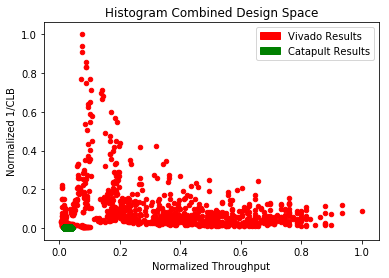

In [2]:
ax1 = vHistdf.plot(x='nTput', y='1/obj2', kind='scatter', c='r')
ax = cHistdf.plot(x='nTput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Results')
plt.legend(handles=[red_data, green_data])
plt.title('Histogram Combined Design Space')
plt.xlabel('Normalized Throughput')
plt.ylabel('Normalized 1/CLB')

Text(0, 0.5, 'Normalized CLB (1/CLB) Utilization')

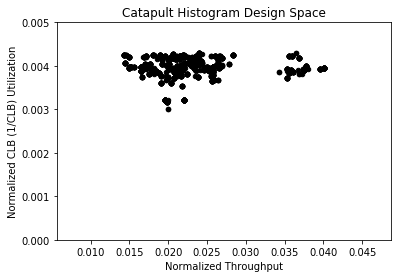

In [3]:
ax = cHistdf.plot(x='nTput', y='1/obj2', kind='scatter', c='black')
ax.set_ylim(0.000, 0.005)
plt.title("Catapult Histogram Design Space")
plt.xlabel("Normalized Throughput")
plt.ylabel("Normalized CLB (1/CLB) Utilization")

Text(0, 0.5, 'Normalized CLB (1/CLB) Utilization')

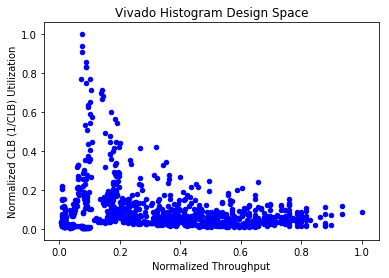

In [4]:
ax = vHistdf.plot(x='nTput', y='1/obj2', kind='scatter', c='blue')
plt.title("Vivado Histogram Design Space")
plt.xlabel("Normalized Throughput")
plt.ylabel("Normalized CLB (1/CLB) Utilization")

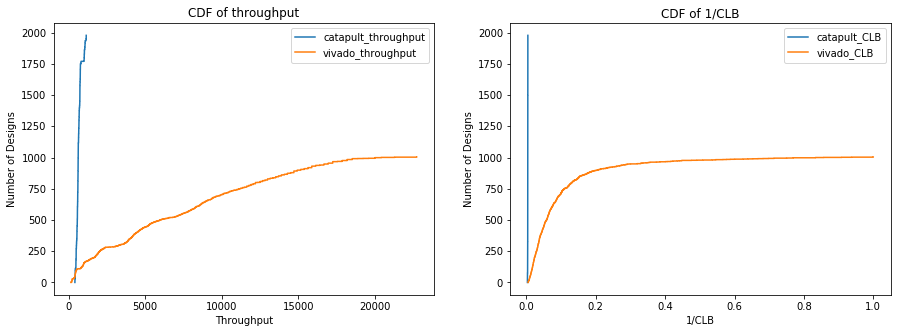

In [5]:


cHistdf['1/obj1']=1/cHistdf['obj1']
vHistdf['1/obj1']=1/vHistdf['obj1']

sorted_data_cat=np.sort(cHistdf['1/obj1'])
sorted_data_viv=np.sort(vHistdf['1/obj1'])
sorted_data_cat2=np.sort(cHistdf['1/obj2'])
sorted_data_viv2=np.sort(vHistdf['1/obj2'])
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.step(np.concatenate([sorted_data_cat, sorted_data_cat[[-1]]]),np.arange(sorted_data_cat.size+1),label='catapult_throughput')
plt.step(np.concatenate([sorted_data_viv, sorted_data_viv[[-1]]]),np.arange(sorted_data_viv.size+1),label='vivado_throughput')
plt.xlabel('Throughput')
plt.ylabel('Number of Designs')
plt.title('CDF of throughput')

plt.legend()
plt.subplot(1,2,2)
plt.step(np.concatenate([sorted_data_cat2, sorted_data_cat2[[-1]]]),np.arange(sorted_data_cat2.size+1),label='catapult_CLB')
plt.step(np.concatenate([sorted_data_viv2, sorted_data_viv2[[-1]]]),np.arange(sorted_data_viv2.size+1),label='vivado_CLB')
plt.xlabel('1/CLB')
plt.ylabel('Number of Designs')
plt.title('CDF of 1/CLB')

plt.legend()



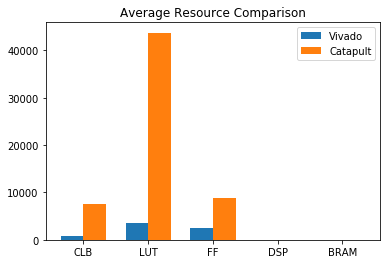

In [6]:


fig, ax = plt.subplots()

N=5
vivado_val=(vHistdf['obj2'].mean(),vHistdf['lut'].mean(),vHistdf['ff'].mean(),vHistdf['dsp'].mean(),vHistdf['bram'].mean())
catapult_val=(cHistdf['obj2'].mean(),cHistdf['lut'].mean(),cHistdf['ff'].mean(),cHistdf['dsp'].mean(),cHistdf['bram'].mean())

ind = np.arange(N)
width = 0.35 

p1=ax.bar(ind,vivado_val,width,label='vivado')
p2=ax.bar(ind+width,catapult_val,width,label='catapult')

ax.set_title('Average Resource Comparison')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('CLB', 'LUT', 'FF', 'DSP', 'BRAM'))

ax.legend((p1[0], p2[0]), ('Vivado', 'Catapult'))

ax.autoscale_view()
plt.show()



Text(0.5, 1.0, 'Resource Distribution')

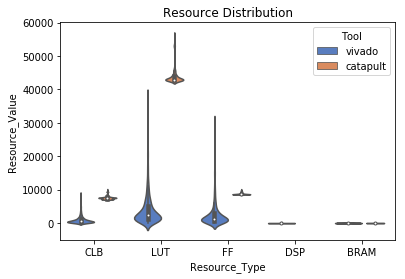

In [7]:


ax = sns.violinplot(x="Resource_Type", y="Resource_Value", hue="Tool",
                    data=violin, palette="muted",
                    scale="count")
plt.title("Resource Distribution")



0.3147966300931025 0.023088968694580388


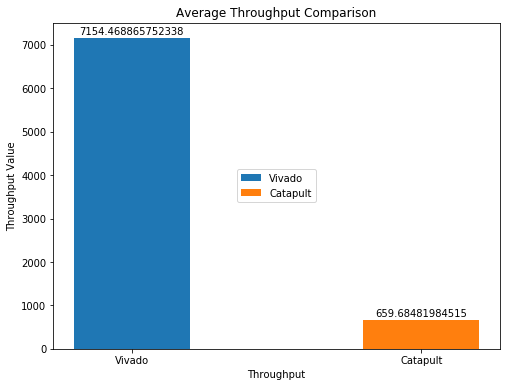

In [8]:
fig, ax = plt.subplots()

N=1
vivado_val=((1/vHistdf['obj1']).mean())
catapult_val=((1/cHistdf['obj1']).mean())
print(vHistdf['nTput'].mean(),cHistdf['nTput'].mean())
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
fig.set_size_inches(8, 6, forward=True)
ind1=[0,0.025]
width = 0.01 
labels=['Vivado','Catapult']
p1=ax.bar(0,vivado_val,width,label='vivado')
p2=ax.bar(0.025,catapult_val,width,label='catapult')

ax.set_title('Average Throughput Comparison')
ax.set_xlabel('Throughput')
ax.set_ylabel('Throughput Value')
ax.set_xticks(ind1)
ax.set_xticklabels(labels)

autolabel(p1)
autolabel(p2)
ax.legend((p1[0], p2[0]), ('Vivado', 'Catapult'),loc="center")


Text(0.5, 1.0, 'Throughput Distribution')

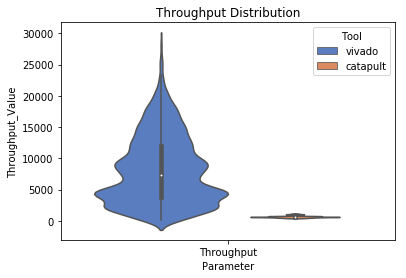

In [9]:
ax=sns.violinplot(x="Parameter",y="Throughput_Value",data=violin,hue="Tool",palette="muted",scale="count")
plt.title("Throughput Distribution")

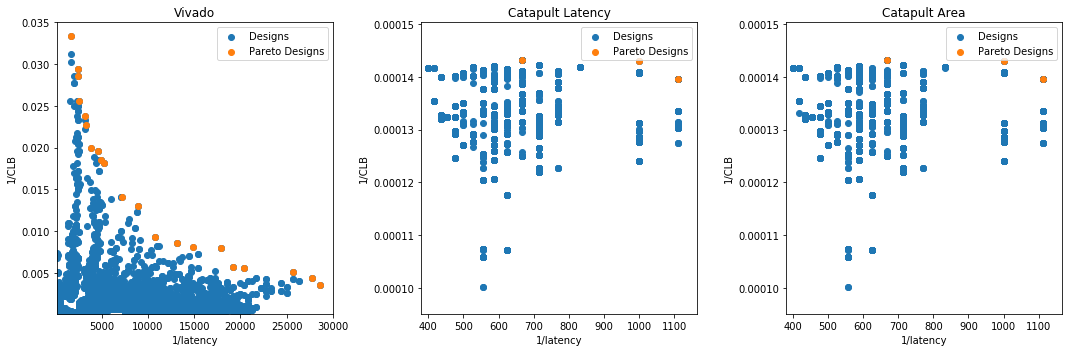

In [10]:
sys.path.append('./pareto_files')
from utils import adrs, read_design_space, approximate_pareto


X1, y1, _, names1, _ = read_design_space('../csv/vivado_histogram_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

X2, y2, _, names2, _ = read_design_space('../csv/catapult_histogram_latency_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

X3, y3, _, names3, _ = read_design_space('../csv/catapult_histogram_area_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)



plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
y_pareto1 = approximate_pareto(y1)[0]
y_pareto1_index = approximate_pareto(y1)[1]
plt.scatter(y1[:,0], y1[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto1[:,0], y_pareto1[:,1],label='Pareto Designs')
plt.legend()
plt.title("Vivado")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y1[:,0].min()*0.95, right=y1[:,0].max()*1.05)
plt.ylim(bottom=y1[:,1].min()*0.95, top=y1[:,1].max()*1.05)
plt.tight_layout()


plt.subplot(1,3,2)
y_pareto2 = approximate_pareto(y2)[0]
y_pareto2_index = approximate_pareto(y2)[1]
plt.scatter(y2[:,0], y2[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],label='Pareto Designs')
plt.legend()
plt.title("Catapult Latency")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y2[:,0].min()*0.95, right=y2[:,0].max()*1.05)
plt.ylim(bottom=y2[:,1].min()*0.95, top=y2[:,1].max()*1.05)
plt.tight_layout()


plt.subplot(1,3,3)
y_pareto3 = approximate_pareto(y3)[0]
y_pareto3_index = approximate_pareto(y3)[1]
plt.scatter(y3[:,0], y3[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto3[:,0], y_pareto3[:,1],label='Pareto Designs')
plt.legend()
plt.title("Catapult Area")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y3[:,0].min()*0.95, right=y3[:,0].max()*1.05)
plt.ylim(bottom=y3[:,1].min()*0.95, top=y3[:,1].max()*1.05)
plt.tight_layout()

(0.0, 0.050001161845009856)

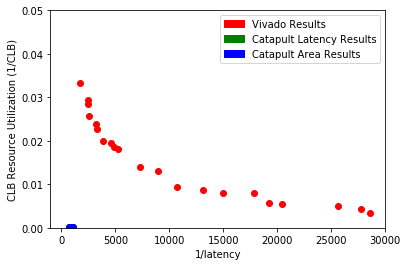

In [11]:
plt.scatter(y_pareto1[:,0], y_pareto1[:,1],c='r')
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],c='g')
plt.scatter(y_pareto3[:,0], y_pareto3[:,1],c='b')


red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Latency Results')
blue_data=mpatches.Patch(color='blue',label='Catapult Area Results')
plt.legend(handles=[red_data, green_data,blue_data])
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')
plt.ylim(0.000)

In [12]:
vivdfx = pd.read_csv("../csv/vivado_histogram_sherlock.csv", index_col=0)
c_latdfx = pd.read_csv("../csv/catapult_histogram_latency_sherlock.csv", index_col=0)
c_areadfx = pd.read_csv("../csv/catapult_histogram_area_sherlock.csv", index_col=0)

In [13]:
y_pareto1_sorted=[]
y_pareto2_sorted=[]
y_pareto3_sorted=[]
for i in range(len(y_pareto1_index)):
    y_pareto1_sorted.append((i,y_pareto1[i][0],y_pareto1[i][1]))
y_pareto1_sorted=sorted(y_pareto1_sorted, key=itemgetter(2))

for i in range(len(y_pareto2_index)):
    y_pareto2_sorted.append((i,y_pareto2[i][0],y_pareto2[i][1]))
y_pareto2_sorted=sorted(y_pareto2_sorted, key=itemgetter(2))

for i in range(len(y_pareto3_index)):
    y_pareto3_sorted.append((i,y_pareto3[i][0],y_pareto3[i][1]))
y_pareto3_sorted=sorted(y_pareto3_sorted, key=itemgetter(2))

In [14]:

def euclid(a,b,c,d):
    t=math.sqrt(((a-b)**2)+((c-d)**2))
    return t

In [15]:
viv_esp=0.03
c_lat_esp=0.03
c_area_esp=0.03

In [16]:
vivdfx_copy=vivdfx.copy()
for i in y_pareto1_index:
    vivdfx_copy=vivdfx_copy.drop(index=i)
viv_pts=[]
for i in range(len(y_pareto1_index)):
    for index,row in vivdfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto1[i][0],1/row['obj2'],y_pareto1[i][1])<viv_esp:
            if index in viv_pts:
                pass
            else:
                viv_pts.append(index)

c_latdfx_copy=c_latdfx.copy()
for i in y_pareto2_index:
    c_latdfx_copy=c_latdfx_copy.drop(index=i)
c_lat_pts=[]
for i in range(len(y_pareto2_index)):
    for index,row in c_latdfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto2[i][0],1/row['obj2'],y_pareto2[i][1])<c_lat_esp:
            if index in c_lat_pts:
                pass
            else:
                c_lat_pts.append(index)
                
                
c_areadfx_copy=c_areadfx.copy()
for i in y_pareto3_index:
    c_areadfx_copy=c_areadfx_copy.drop(index=i)
c_area_pts=[]
for i in range(len(y_pareto3_index)):
    for index,row in c_areadfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto3[i][0],1/row['obj2'],y_pareto3[i][1])<c_area_esp:
            if index in c_area_pts:
                pass
            else:
                c_area_pts.append(index)

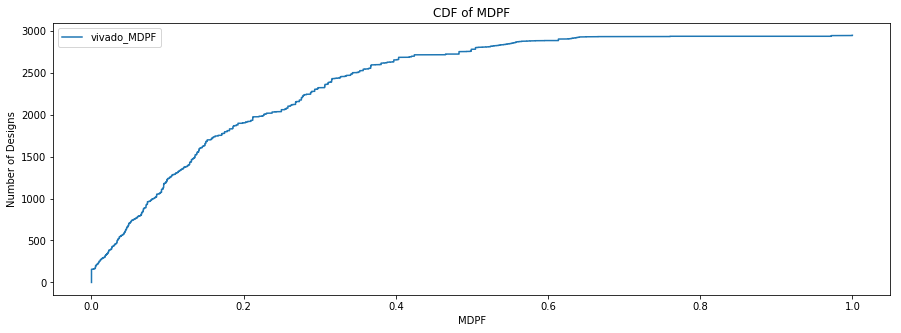

In [17]:
viv_adrs=[]
for index,row in vivdfx_copy.iterrows():
    min_val=1000000000000000000000000000
    for i in range(len(y_pareto1_index)):
        a=euclid(1/row['obj1'],y_pareto1[i][0],1/row['obj2'],y_pareto1[i][1])
        if a<min_val:
            min_val=a
    viv_adrs.append(min_val)


sorted_viv_adrs=np.sort(viv_adrs)
max_val=sorted_viv_adrs.max()
sorted_viv_adrs=sorted_viv_adrs/sorted_viv_adrs.max()

plt.figure(figsize=(15, 5))
plt.step(np.concatenate([sorted_viv_adrs, sorted_viv_adrs[[-1]]]),np.arange(sorted_viv_adrs.size+1),label='vivado_MDPF')
plt.xlabel('MDPF')
plt.ylabel('Number of Designs')
plt.title('CDF of MDPF')


plt.legend()

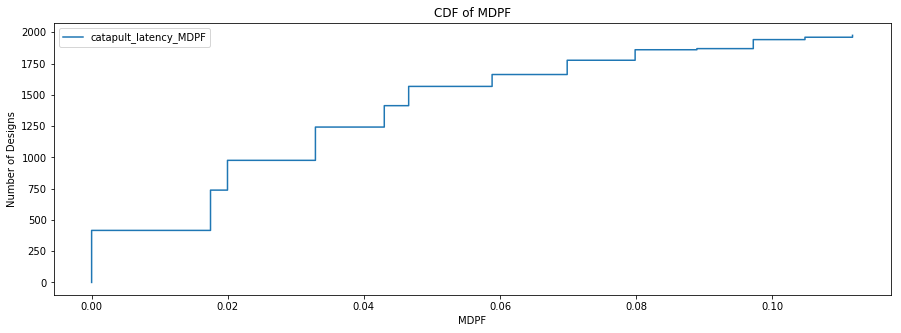

In [18]:

c_lat_adrs=[]
for index,row in c_latdfx_copy.iterrows():
    min_val=10000000000000000000000000
    for i in range(len(y_pareto2_index)):
        a=euclid(1/row['obj1'],y_pareto2[i][0],1/row['obj2'],y_pareto2[i][1])
        if a<min_val:
            min_val=a
    c_lat_adrs.append(min_val)



sorted_c_lat_adrs=np.sort(c_lat_adrs)
sorted_c_lat_adrs=sorted_c_lat_adrs/max_val

plt.figure(figsize=(15, 5))
plt.step(np.concatenate([sorted_c_lat_adrs, sorted_c_lat_adrs[[-1]]]),np.arange(sorted_c_lat_adrs.size+1),label='catapult_latency_MDPF')
plt.xlabel('MDPF')
plt.ylabel('Number of Designs')
plt.title('CDF of MDPF')


plt.legend()

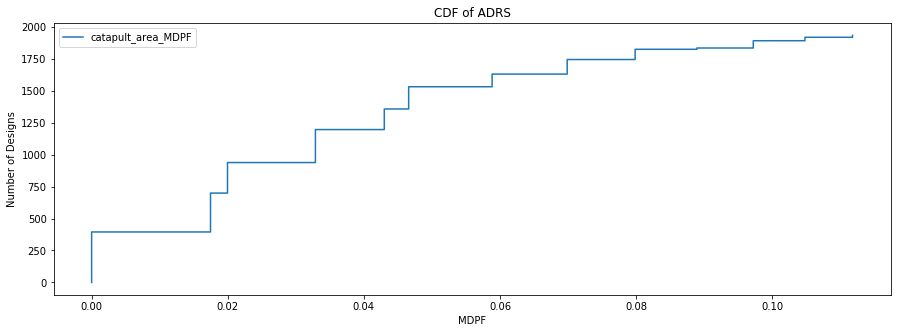

In [19]:
c_area_adrs=[]
for index,row in c_areadfx_copy.iterrows():
    min_val=100000000000
    for i in range(len(y_pareto3_index)):
        a=euclid(1/row['obj1'],y_pareto3[i][0],1/row['obj2'],y_pareto3[i][1])
        if a<min_val:
            min_val=a
    c_area_adrs.append(min_val)



sorted_c_area_adrs=np.sort(c_area_adrs)
sorted_c_area_adrs=sorted_c_area_adrs/max_val

plt.figure(figsize=(15, 5))
plt.step(np.concatenate([sorted_c_area_adrs, sorted_c_area_adrs[[-1]]]),np.arange(sorted_c_area_adrs.size+1),label='catapult_area_MDPF')
plt.xlabel('MDPF')
plt.ylabel('Number of Designs')
plt.title('CDF of ADRS')


plt.legend()

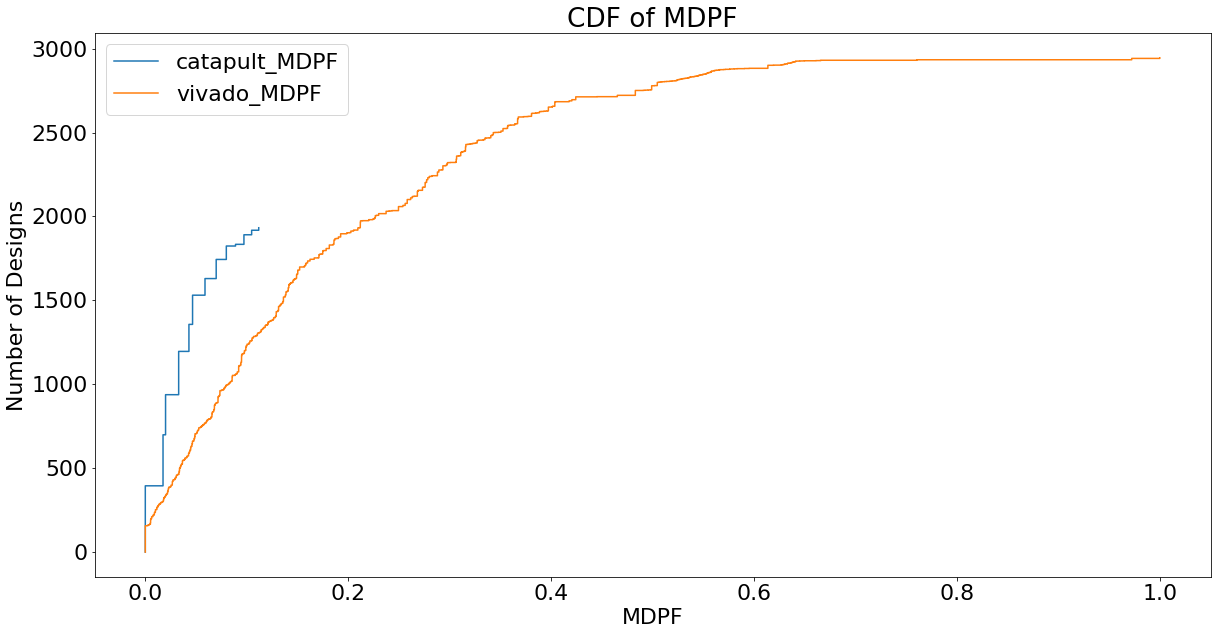

In [21]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 22})
plt.step(np.concatenate([sorted_c_area_adrs, sorted_c_area_adrs[[-1]]]),np.arange(sorted_c_area_adrs.size+1),label='catapult_MDPF')
plt.step(np.concatenate([sorted_viv_adrs, sorted_viv_adrs[[-1]]]),np.arange(sorted_viv_adrs.size+1),label='vivado_MDPF')
plt.xlabel('MDPF')
plt.ylabel('Number of Designs')
plt.title('CDF of MDPF')

plt.legend()